In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("station_hour_updated.csv")

In [3]:
data.shape

(203693, 16)

In [4]:
data.head()

StationId             Datetime   PM2.5    PM10    NO    NO2    NOx   NH3  \
0     AP001  2017-11-25 09:00:00  104.00  148.50  1.93  23.00  13.75  9.80   
1     AP001  2017-11-25 10:00:00   94.50  142.00  1.33  16.25   9.75  9.65   
2     AP001  2017-11-25 11:00:00   82.75  126.50  1.47  14.83   9.07  9.70   
3     AP001  2017-11-25 14:00:00   68.50  117.00  1.35  13.60   8.35  7.40   
4     AP001  2017-11-25 15:00:00   69.25  112.25  1.52  11.80   7.55  9.25   

    CO    SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  0.1  15.30  117.62     0.30    10.40    0.23  155.0   Moderate  
1  0.1  17.00  136.23     0.28     7.10    0.15  159.0   Moderate  
2  0.1  15.40  149.92     0.20     4.55    0.08  173.0   Moderate  
3  0.1  21.80  161.70     0.10     2.30    0.00  191.0   Moderate  
4  0.1  21.38  161.68     0.10     2.35    0.00  191.0   Moderate

In [5]:
data.isnull().sum()

StationId     0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

<AxesSubplot:>

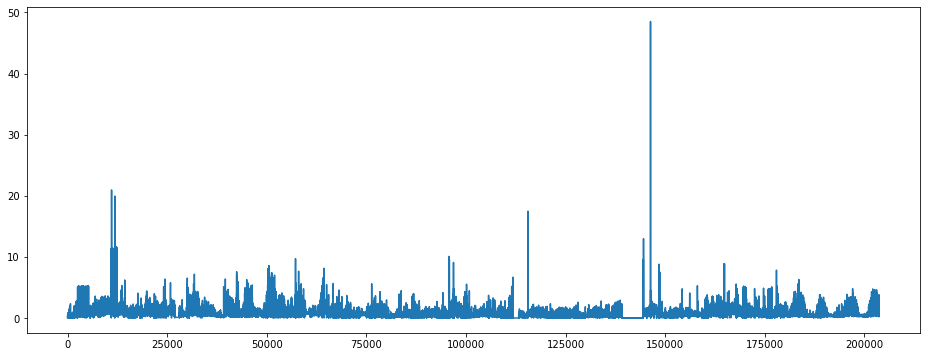

In [6]:
data['CO'].plot(figsize=(16,6))

In [7]:
X= data[['CO']]
y = data['PM2.5']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

In [10]:
regression.fit(X_train, y_train)

LinearRegression()

In [11]:
prediction = regression.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
regression.score(X_train, y_train)

0.22903012885905727

In [14]:
regression.score(X_test, y_test)

0.2468870357530788

In [15]:
graph = data.head(25)

In [16]:
lineStart = X.min() 
lineEnd = y.max() 

C:\Users\SWARUP\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

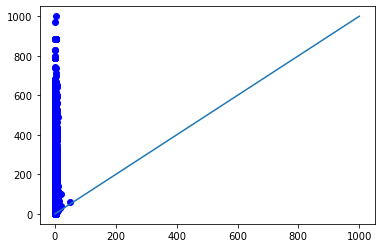

In [17]:
plt.scatter(X, y, c ="blue")
plt.plot([lineStart, lineEnd], [lineStart, lineEnd])
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
